In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

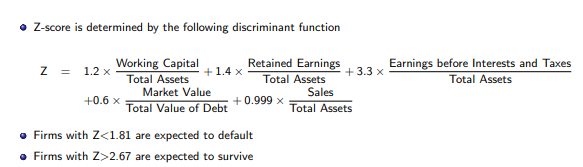

Altman Z-Score

In [2]:
df = pd.read_excel('FE_Bloomberg.xlsx')

In [3]:
df

,Value,2014,2015,2016,2017,2018
0,Current Assets,3.358000e+09,3.040000e+09,2.950000e+09,3.110000e+09,2.392000e+09
1,Current Liabilities,5.561000e+09,5.602000e+09,7.126000e+09,4.113000e+09,4.634000e+09
2,Working Capital,-2.203000e+09,-2.562000e+09,-4.176000e+09,-1.003000e+09,-2.242000e+09
3,Total Assets,5.164800e+10,5.218700e+10,4.314800e+10,4.225700e+10,4.006300e+10
4,Retained Earnings,2.531000e+09,2.427000e+09,-4.358000e+09,-6.120000e+09,-4.838000e+09
5,Earnings Before Interest and Taxes,2.097780e+09,2.497080e+09,2.430000e+09,2.469000e+09,2.592940e+09
6,Market Value Equity,1.242200e+10,1.242200e+10,6.241000e+09,3.925000e+09,6.814000e+09
7,Long Term-Liabilities,3.366500e+10,3.416300e+10,2.978100e+10,3.421900e+10,2.861500e+10
8,Total Debt,3.922600e+10,3.976500e+10,3.690700e+10,3.833200e+10,3.324900e+10
9,Sales,1.504900e+10,1.502600e+10,1.070000e+10,1.092800e+10,1.126100e+10


Define Parameters

In [4]:
x1 = df.iloc[2, 1:] / df.iloc[3, 1:]
x2 = df.iloc[4, 1:] / df.iloc[3, 1:]
x3 = df.iloc[5, 1:] / df.iloc[3, 1:]
x4 = df.iloc[6, 1:] / df.iloc[8, 1:]
x5 = df.iloc[9, 1:] / df.iloc[3, 1:]

In [5]:
z = 1.2*x1 + 1.4*x2 + 3.3*x3 + 0.6*x4 + 0.999*x5

In [6]:
z_score_table = pd.DataFrame({
    'year' : ['2014', '2015', '2016', '2017', '2018'],
    'x1': x1.values,
    'x2': x2.values,
    'x3': x1.values,
    'x4': x2.values,
    'x5': x1.values,
    'Z': z.values
})

In [7]:
z_score_table

,year,x1,x2,x3,x4,x5,Z
0,2014,-0.042654,0.049005,-0.042654,0.049005,-0.042654,0.632549
1,2015,-0.049093,0.046506,-0.049093,0.046506,-0.049093,0.639167
2,2016,-0.096783,-0.101001,-0.096783,-0.101001,-0.096783,0.277503
3,2017,-0.023736,-0.144828,-0.023736,-0.144828,-0.023736,0.281357
4,2018,-0.055962,-0.12076,-0.055962,-0.12076,-0.055962,0.381128


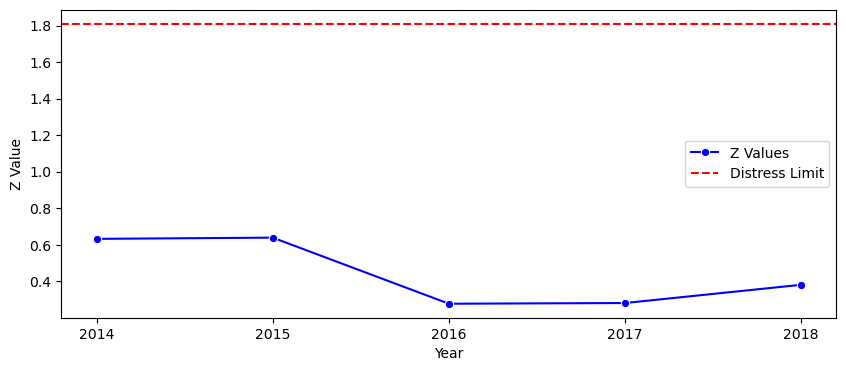

In [8]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='year', y='Z', data=z_score_table, marker='o', color='b', label='Z Values')
plt.axhline(y=1.81, color='r', linestyle='--', label='Distress Limit')
plt.xlabel('Year')
plt.ylabel('Z Value')
plt.legend(loc='center right')
plt.show()

Ohlson O-Score

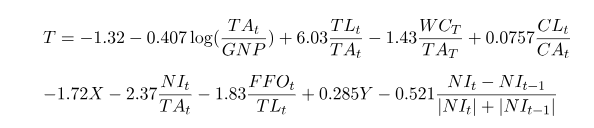

Define Parameters

In [9]:
SIZE = df.iloc[3, 2:] / df.iloc[10, 2:]
TLTA = df.iloc[8, 2:] / df.iloc[3, 2:]
WCTA = df.iloc[2, 2:] / df.iloc[3, 2:]
CLCA = df.iloc[1, 2:] / df.iloc[0, 2:]
OENEG = df.iloc[11, 2:]
NITA = df.iloc[12, 2:] / df.iloc[3, 2:]
FUTL = df.iloc[14, 2:] / df.iloc[8, 2:]
INTWO = df.iloc[13, 2:]
CHIN = df.iloc[16, 2:]

In [10]:
O_score_table = pd.DataFrame({
    'year' : ['2015', '2016', '2017', '2018'],
    'SIZE': SIZE.values,
    'TLTA': TLTA.values,
    'WCTA': WCTA.values,
    'CLCA': CLCA.values,
    'OENEG': OENEG.values,
    'NITA': NITA.values,
    'FUTL': FUTL.values,
    'INTWO': INTWO.values,
    'CHIN': CHIN.values,
})

In [11]:
O_score_table['SIZE'] = pd.to_numeric(O_score_table['SIZE'], errors='coerce')
O_score_table['log_SIZE'] = np.log(O_score_table['SIZE'])
O_score_table

,year,SIZE,TLTA,WCTA,CLCA,OENEG,NITA,FUTL,INTWO,CHIN,log_SIZE
0,2015,5.363460e+08,0.761971,-0.049093,1.842763,1.0,0.011076,0.086684,0.0,0.31813,20.100290
1,2016,4.392548e+08,0.855358,-0.096783,2.415593,1.0,-0.143158,0.091663,1.0,-1.0,19.900590
2,2017,4.225700e+08,0.907116,-0.023736,1.322508,1.0,-0.040798,0.099343,1.0,0.5636,19.861866
3,2018,3.919138e+08,0.829918,-0.055962,1.937291,1.0,0.033647,0.042407,1.0,1.0,19.786553


In [12]:
O_score_table['O'] = -1.32 - 0.407 * O_score_table['log_SIZE'] + 6.03 * O_score_table['TLTA'] - 1.43 * O_score_table['WCTA'] + 0.0757 * O_score_table['CLCA'] - 1.72 * O_score_table['OENEG'] - 2.37 * O_score_table['NITA'] - 1.83 * O_score_table['FUTL'] + 0.285 * O_score_table['INTWO'] - 0.521 * O_score_table['CHIN']

In [13]:
O_score_table

,year,SIZE,TLTA,WCTA,CLCA,OENEG,NITA,FUTL,INTWO,CHIN,log_SIZE,O
0,2015,5.363460e+08,0.761971,-0.049093,1.842763,1.0,0.011076,0.086684,0.0,0.31813,20.100290,-6.767058
1,2016,4.392548e+08,0.855358,-0.096783,2.415593,1.0,-0.143158,0.091663,1.0,-1.0,19.900590,-4.682927
2,2017,4.225700e+08,0.907116,-0.023736,1.322508,1.0,-0.040798,0.099343,1.0,0.5636,19.861866,-5.613555
3,2018,3.919138e+08,0.829918,-0.055962,1.937291,1.0,0.033647,0.042407,1.0,1.0,19.786553,-6.255392


In [14]:
O_score_table['O'] = pd.to_numeric(O_score_table['O'], errors='coerce')
O_score_table['Default Probability'] = 1 / ( 1 + np.exp(O_score_table['O']))

In [15]:
O_score_table

,year,SIZE,TLTA,WCTA,CLCA,OENEG,NITA,FUTL,INTWO,CHIN,log_SIZE,O,Default Probability
0,2015,5.363460e+08,0.761971,-0.049093,1.842763,1.0,0.011076,0.086684,0.0,0.31813,20.100290,-6.767058,0.998850
1,2016,4.392548e+08,0.855358,-0.096783,2.415593,1.0,-0.143158,0.091663,1.0,-1.0,19.900590,-4.682927,0.990833
2,2017,4.225700e+08,0.907116,-0.023736,1.322508,1.0,-0.040798,0.099343,1.0,0.5636,19.861866,-5.613555,0.996365
3,2018,3.919138e+08,0.829918,-0.055962,1.937291,1.0,0.033647,0.042407,1.0,1.0,19.786553,-6.255392,0.998084


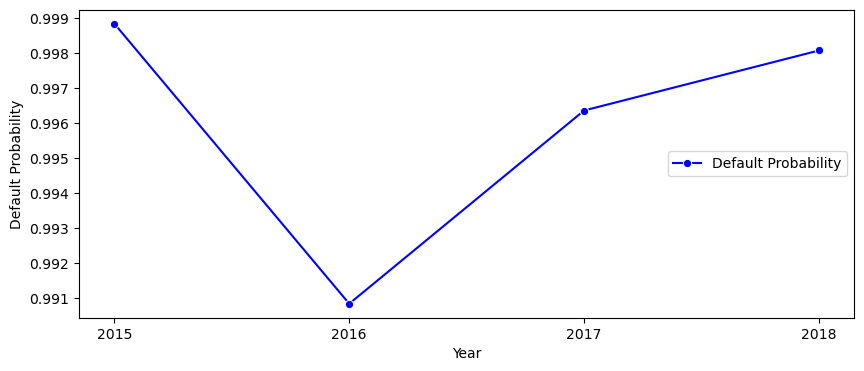

In [16]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='year', y = 'Default Probability' , data=O_score_table, marker='o', color='b', label='Default Probability')
plt.xlabel('Year')
plt.ylabel('Default Probability')
plt.legend(loc='center right')
plt.show()